In [110]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [111]:
with open('transaction-data-adhoc-analysis.json', 'r') as f:
    data = json.load(f)

In [112]:
df = pd.DataFrame(data, columns = ['address', 'birthdate', 'mail', 'name', 'sex', 'username', 'transaction_items', 'transaction_value', 'transaction_date'])

In [113]:
modified_df =(df.set_index(['address','birthdate','mail','name','sex','username','transaction_value','transaction_date'])
.apply(lambda x: x.str.split(';').explode())
.reset_index())

In [114]:
month_as_number = modified_df['transaction_month'] = [x[7][6] for x in np.array(modified_df)]

def get_month(month_as_number):
    if month_as_number == '1':
        return 'January'
    elif month_as_number == '2':
        return 'February'
    elif month_as_number == '3':
        return 'March'
    elif month_as_number == '4':
        return 'April'
    elif month_as_number == '5':
        return 'May'
    elif month_as_number == '6':
        return 'June' 

modified_df['transaction_month'] = modified_df['transaction_month'].apply(get_month)

In [115]:
modified_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",January
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",January
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",January
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January
...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",June
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",June
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",June
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",June


In [116]:
cond1 = modified_df['transaction_items'].str.contains('Beef Chicharon')
cond2 = modified_df['transaction_items'].str.contains('Kimchi and Seaweed')
cond3 = modified_df['transaction_items'].str.contains('Nutrional Milk')
cond4 = modified_df['transaction_items'].str.contains('Yummy Vegetables')
cond5 = modified_df['transaction_items'].str.contains('Gummy Vitamins')
cond6 = modified_df['transaction_items'].str.contains('Orange Beans')
cond7 = modified_df['transaction_items'].str.contains('Gummy Worms')

In [117]:
modified_df['beef_chicharon_order_qty'] = None
modified_df['beef_chicharon_order_qty']=np.where(cond1,modified_df.transaction_items,modified_df.beef_chicharon_order_qty)

modified_df['kimchi_and_seaweed_order_qty'] = None
modified_df['kimchi_and_seaweed_order_qty']=np.where(cond2,modified_df.transaction_items,modified_df.kimchi_and_seaweed_order_qty)

modified_df['nutrional_milk_order_qty'] = None
modified_df['nutrional_milk_order_qty']=np.where(cond3,modified_df.transaction_items,modified_df.nutrional_milk_order_qty)

modified_df['yummy_vegetables_order_qty'] = None
modified_df['yummy_vegetables_order_qty']=np.where(cond4,modified_df.transaction_items,modified_df.yummy_vegetables_order_qty)

modified_df['gummy_vitamins_order_qty'] = None
modified_df['gummy_vitamins_order_qty']=np.where(cond5,modified_df.transaction_items,modified_df.gummy_vitamins_order_qty)

modified_df['orange_beans_order_qty'] = None
modified_df['orange_beans_order_qty']=np.where(cond6,modified_df.transaction_items,modified_df.orange_beans_order_qty)

modified_df['gummy_worms_order_qty'] = None
modified_df['gummy_worms_order_qty']=np.where(cond7,modified_df.transaction_items,modified_df.gummy_worms_order_qty)

In [118]:
modified_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,beef_chicharon_order_qty,kimchi_and_seaweed_order_qty,nutrional_milk_order_qty,yummy_vegetables_order_qty,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",January,"Exotic Extras,Beef Chicharon,(x4)",None,None,None,None,None,None
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",January,"Exotic Extras,Beef Chicharon,(x3)",None,None,None,None,None,None
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",January,None,None,"HealthyKid 3+,Nutrional Milk,(x4)",None,None,None,None
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",January,None,None,None,None,None,"Candy City,Orange Beans,(x1)",None
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,None,None,None,None,"HealthyKid 3+,Gummy Vitamins,(x3)",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",June,None,None,"HealthyKid 3+,Nutrional Milk,(x2)",None,None,None,None
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",June,None,None,None,None,None,None,"Candy City,Gummy Worms,(x2)"
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",June,None,None,"HealthyKid 3+,Nutrional Milk,(x1)",None,None,None,None
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",June,None,None,None,None,None,None,"Candy City,Gummy Worms,(x3)"


In [119]:
modified_df = modified_df.fillna(0)

In [120]:
modified_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,beef_chicharon_order_qty,kimchi_and_seaweed_order_qty,nutrional_milk_order_qty,yummy_vegetables_order_qty,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",January,"Exotic Extras,Beef Chicharon,(x4)",0,0,0,0,0,0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",January,"Exotic Extras,Beef Chicharon,(x3)",0,0,0,0,0,0
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",January,0,0,"HealthyKid 3+,Nutrional Milk,(x4)",0,0,0,0
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",January,0,0,0,0,0,"Candy City,Orange Beans,(x1)",0
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,0,0,0,0,"HealthyKid 3+,Gummy Vitamins,(x3)",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",June,0,0,"HealthyKid 3+,Nutrional Milk,(x2)",0,0,0,0
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",June,0,0,0,0,0,0,"Candy City,Gummy Worms,(x2)"
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",June,0,0,"HealthyKid 3+,Nutrional Milk,(x1)",0,0,0,0
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",June,0,0,0,0,0,0,"Candy City,Gummy Worms,(x3)"


In [121]:
modified_df['beef_chicharon_order_qty'] = modified_df['beef_chicharon_order_qty'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
modified_df['kimchi_and_seaweed_order_qty'] = modified_df['kimchi_and_seaweed_order_qty'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
modified_df['orange_beans_order_qty'] = modified_df['orange_beans_order_qty'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
modified_df['gummy_worms_order_qty'] = modified_df['gummy_worms_order_qty'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

modified_df['nutrional_milk_order_qty'] = modified_df['nutrional_milk_order_qty'].str.findall('(\d+)').str[1]
modified_df['yummy_vegetables_order_qty'] = modified_df['yummy_vegetables_order_qty'].str.findall('(\d+)').str[1]
modified_df['gummy_vitamins_order_qty'] = modified_df['gummy_vitamins_order_qty'].str.findall('(\d+)').str[1]
modified_df

,address,birthdate,mail,name,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,beef_chicharon_order_qty,kimchi_and_seaweed_order_qty,nutrional_milk_order_qty,yummy_vegetables_order_qty,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",January,4,0,NaN,NaN,NaN,0,0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",January,3,0,NaN,NaN,NaN,0,0
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",January,0,0,4,NaN,NaN,0,0
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,12056,2022/01/12,"Candy City,Orange Beans,(x1)",January,0,0,NaN,NaN,NaN,1,0
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,0,0,NaN,NaN,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",June,0,0,2,NaN,NaN,0,0
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",June,0,0,NaN,NaN,NaN,0,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",June,0,0,1,NaN,NaN,0,0
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",June,0,0,NaN,NaN,NaN,0,3


In [122]:
modified_df = modified_df.fillna(0)

In [123]:
modified_df['nutrional_milk_order_qty'] = modified_df['nutrional_milk_order_qty'].astype(str).astype(int)
modified_df['yummy_vegetables_order_qty'] = modified_df['yummy_vegetables_order_qty'].astype(str).astype(int)
modified_df['gummy_vitamins_order_qty'] = modified_df['gummy_vitamins_order_qty'].astype(str).astype(int)

In [124]:
modified_df.groupby(['transaction_month'])[['beef_chicharon_order_qty', 'kimchi_and_seaweed_order_qty', 'nutrional_milk_order_qty', 'yummy_vegetables_order_qty', 'gummy_vitamins_order_qty', 'orange_beans_order_qty', 'gummy_worms_order_qty']].sum().reset_index()

,transaction_month,beef_chicharon_order_qty,kimchi_and_seaweed_order_qty,nutrional_milk_order_qty,yummy_vegetables_order_qty,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty
0,April,9890,9921,9786,9861,9842,9914,10043
1,February,10001,9949,9691,10256,9980,10037,9996
2,January,9665,9676,9727,9959,9681,9774,9559
3,June,9902,10104,9767,9722,9980,10106,9934
4,March,9816,9967,9876,9896,10145,9611,9986
5,May,10028,9773,9881,9735,9948,9964,9801


In [125]:
#pivot table 1 - breakdown of count of each item/product per month
pivot = modified_df.pivot_table(index =['transaction_month'],
                       values =['beef_chicharon_order_qty', 'kimchi_and_seaweed_order_qty', 'nutrional_milk_order_qty', 'yummy_vegetables_order_qty', 'gummy_vitamins_order_qty', 'orange_beans_order_qty', 'gummy_worms_order_qty'],
                       aggfunc ='sum')

transaction_month = ['January', 'February', 'March', 'April', 'May', 'June']
pivot = pivot.reindex(transaction_month)
pivot

#pngs of final tables using the imported dataframe-image library and the following code: pivot.dfi.export('quantity.png'); filenames just differed per visual

,beef_chicharon_order_qty,gummy_vitamins_order_qty,gummy_worms_order_qty,kimchi_and_seaweed_order_qty,nutrional_milk_order_qty,orange_beans_order_qty,yummy_vegetables_order_qty
transaction_month,,,,,,,
January,9665,9681,9559,9676,9727,9774,9959
February,10001,9980,9996,9949,9691,10037,10256
March,9816,10145,9986,9967,9876,9611,9896
April,9890,9842,10043,9921,9786,9914,9861
May,10028,9948,9801,9773,9881,9964,9735
June,9902,9980,9934,10104,9767,10106,9722


In [126]:
beef_chicharon_qty = modified_df['beef_chicharon_sale_value'] = [x[10] for x in np.array(modified_df)]

def get_beef_chicharon_revenue(beef_chicharon_qty):
    if beef_chicharon_qty != 0:
        return 1299*beef_chicharon_qty
    else:
        return 0 

modified_df['beef_chicharon_sale_value'] = modified_df['beef_chicharon_sale_value'].apply(get_beef_chicharon_revenue)

In [127]:
kimchi_and_seaweed_qty = modified_df['kimchi_and_seaweed_sale_value'] = [x[11] for x in np.array(modified_df)]

def get_kimchi_and_seaweed_revenue(kimchi_and_seaweed_qty):
    if kimchi_and_seaweed_qty != 0:
        return 799*kimchi_and_seaweed_qty
    else:
        return 0 

modified_df['kimchi_and_seaweed_sale_value'] = modified_df['kimchi_and_seaweed_sale_value'].apply(get_kimchi_and_seaweed_revenue)

In [128]:
nutrional_milk_qty = modified_df['nutrional_milk_sale_value'] = [x[12] for x in np.array(modified_df)]

def get_nutrional_milk_revenue(nutrional_milk_qty):
    if nutrional_milk_qty != 0:
        return 1990*nutrional_milk_qty
    else:
        return 0 

modified_df['nutrional_milk_sale_value'] = modified_df['nutrional_milk_sale_value'].apply(get_nutrional_milk_revenue)

In [129]:
yummy_vegetables_qty = modified_df['yummy_vegetables_sale_value'] = [x[13] for x in np.array(modified_df)]

def get_yummy_vegetables_revenue(yummy_vegetables_qty):
    if yummy_vegetables_qty != 0:
        return 500*yummy_vegetables_qty
    else:
        return 0 

modified_df['yummy_vegetables_sale_value'] = modified_df['yummy_vegetables_sale_value'].apply(get_yummy_vegetables_revenue)

In [130]:
gummy_vitamins_qty = modified_df['gummy_vitamins_sale_value'] = [x[14] for x in np.array(modified_df)]

def get_gummy_vitamins_revenue(gummy_vitamins_qty):
    if gummy_vitamins_qty != 0:
        return 1500*gummy_vitamins_qty
    else:
        return 0 

modified_df['gummy_vitamins_sale_value'] = modified_df['gummy_vitamins_sale_value'].apply(get_gummy_vitamins_revenue)

In [131]:
orange_beans_qty = modified_df['orange_beans_sale_value'] = [x[15] for x in np.array(modified_df)]

def get_orange_beans_revenue(orange_beans_qty):
    if orange_beans_qty != 0:
        return 199*orange_beans_qty
    else:
        return 0 

modified_df['orange_beans_sale_value'] = modified_df['orange_beans_sale_value'].apply(get_orange_beans_revenue)

In [132]:
gummy_worms_qty = modified_df['gummy_worms_sale_value'] = [x[16] for x in np.array(modified_df)]

def get_gummy_worms_revenue(gummy_worms_qty):
    if gummy_worms_qty != 0:
        return 150*gummy_worms_qty
    else:
        return 0 

modified_df['gummy_worms_sale_value'] = modified_df['gummy_worms_sale_value'].apply(get_gummy_worms_revenue)

In [133]:
#pivot 2 - breakdown of sale value of each item/product per month
pivot2 = modified_df.pivot_table(index =['transaction_month'],
                       values =['beef_chicharon_sale_value', 'kimchi_and_seaweed_sale_value', 'nutrional_milk_sale_value', 'yummy_vegetables_sale_value', 'gummy_vitamins_sale_value', 'orange_beans_sale_value', 'gummy_worms_sale_value'],
                       aggfunc ='sum')

column_names = ['beef_chicharon_sale_value', 'gummy_vitamins_sale_value', 'gummy_worms_sale_value', 'kimchi_and_seaweed_sale_value', 'nutrional_milk_sale_value', 'orange_beans_sale_value', 'yummy_vegetables_sale_value']
pivot2 = pivot2.reindex(columns=column_names)

transaction_month = ['January', 'February', 'March', 'April', 'May', 'June']
pivot2 = pivot2.reindex(transaction_month)
pivot2

,beef_chicharon_sale_value,gummy_vitamins_sale_value,gummy_worms_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,orange_beans_sale_value,yummy_vegetables_sale_value
transaction_month,,,,,,,
January,12554835,14521500,1433850,7731124,19356730,1945026,4979500
February,12991299,14970000,1499400,7949251,19285090,1997363,5128000
March,12750984,15217500,1497900,7963633,19653240,1912589,4948000
April,12847110,14763000,1506450,7926879,19474140,1972886,4930500
May,13026372,14922000,1470150,7808627,19663190,1982836,4867500
June,12862698,14970000,1490100,8073096,19436330,2011094,4861000


In [134]:
customer_data_df = modified_df.groupby(['name', 'transaction_month'], as_index=False).first()

In [135]:
customer_data_df

,name,transaction_month,address,birthdate,mail,sex,username,transaction_value,transaction_date,transaction_items,...,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty,beef_chicharon_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,yummy_vegetables_sale_value,gummy_vitamins_sale_value,orange_beans_sale_value,gummy_worms_sale_value
0,Aaron Beasley,April,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4588,2022/04/24,"HealthyKid 3+,Nutrional Milk,(x1)",...,0,0,0,0,0,1990,0,0,0,0
1,Aaron Beasley,June,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,1500,2022/06/27,"HealthyKid 3+,Gummy Vitamins,(x1)",...,1,0,0,0,0,0,0,1500,0,0
2,Aaron Beasley,May,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4500,2022/05/22,"HealthyKid 3+,Gummy Vitamins,(x3)",...,3,0,0,0,0,0,0,4500,0,0
3,Aaron Brewer,April,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,600,2022/04/05,"Candy City,Gummy Worms,(x4)",...,0,0,4,0,0,0,0,0,0,600
4,Aaron Brewer,February,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,6420,2022/02/26,"Candy City,Gummy Worms,(x3)",...,0,0,3,0,0,0,0,0,0,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,Zachary York,February,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,6194,2022/02/22,"Candy City,Gummy Worms,(x4)",...,0,0,4,0,0,0,0,0,0,600
39613,Zachary York,January,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,7960,2022/01/03,"HealthyKid 3+,Nutrional Milk,(x4)",...,0,0,0,0,0,7960,0,0,0,0
39614,Zachary York,June,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,5696,2022/06/10,"HealthyKid 3+,Gummy Vitamins,(x1)",...,1,0,0,0,0,0,0,1500,0,0
39615,Zachary York,March,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,11970,2022/03/18,"HealthyKid 3+,Gummy Vitamins,(x4)",...,4,0,0,0,0,0,0,6000,0,0


In [136]:
array_agg = lambda x: '|'.join(x.astype(str))
customer_data_df = customer_data_df.groupby(['name']).agg({'transaction_month': array_agg})

for x in transaction_month:
    customer_data_df[x] = customer_data_df['transaction_month'].str.contains(x)

customer_data_df

,transaction_month,January,February,March,April,May,June
name,,,,,,,
Aaron Beasley,April|June|May,False,False,False,True,True,True
Aaron Brewer,April|February|January|June|March,True,True,True,True,False,True
Aaron Brown,April|June|March|May,False,False,True,True,True,True
Aaron Coffey,April|February|January|March|May,True,True,True,True,True,False
Aaron Davis,April|February|January|June|May,True,True,False,True,True,True
...,...,...,...,...,...,...,...
Zachary Valentine,April|February|January|June|March|May,True,True,True,True,True,True
Zachary Ware,April|February|January|June|March|May,True,True,True,True,True,True
Zachary Williams,April|February|January|March,True,True,True,True,False,False


In [137]:
separate_truth_table = customer_data_df.loc[:,transaction_month[0]:transaction_month[len(transaction_month)-1]]
separate_truth_table

,January,February,March,April,May,June
name,,,,,,
Aaron Beasley,False,False,False,True,True,True
Aaron Brewer,True,True,True,True,False,True
Aaron Brown,False,False,True,True,True,True
Aaron Coffey,True,True,True,True,True,False
Aaron Davis,True,True,False,True,True,True
...,...,...,...,...,...,...
Zachary Valentine,True,True,True,True,True,True
Zachary Ware,True,True,True,True,True,True
Zachary Williams,True,True,True,True,False,False


In [138]:
for i, v in enumerate(transaction_month):
    if i == 0:
        repeater_customers = 0
        inactive_customers = 0
    else:
        repeater_rows = separate_truth_table.loc[(separate_truth_table[transaction_month[i]] == True) & (separate_truth_table[transaction_month[i-1]] == True)]
        repeater_customers = len(repeater_rows)
        
        january_to_current = separate_truth_table.loc[:, transaction_month[0]:v]
        currently_inactive = january_to_current.loc[(january_to_current[transaction_month[i]] == False)]
        atleast1true = list(currently_inactive.sum(axis = 1))
        inactive_customers = np.count_nonzero(atleast1true)
    
    january_to_current = separate_truth_table.loc[:, transaction_month[0]:v]
    currently_engaged = january_to_current.loc[(january_to_current[transaction_month[i]] == True)]
    all_columns = list(currently_engaged.sum(axis=1))
    engaged_customers = all_columns.count(i+1)
    
    print(v, ":", repeater_customers, "repeaters", inactive_customers, "inactive", engaged_customers, "engaged")    

January : 0 repeaters 0 inactive 6588 engaged
February : 5172 repeaters 1416 inactive 5172 engaged
March : 5216 repeaters 1747 inactive 4126 engaged
April : 5154 repeaters 1909 inactive 3289 engaged
May : 5110 repeaters 1917 inactive 2667 engaged
June : 5193 repeaters 1835 inactive 2190 engaged


In [139]:
#table 3 - repeater,inactive, engaged
customer_activity_data = {'January': [0,0, 6588],'February': [5172, 1416, 5172],'March': [5216, 1747, 4126], 'April': [5154, 1909, 3289], 'May': [5110, 1917, 2667], 'June': [5193, 1835, 2190]}
customer_activity_df = pd.DataFrame(customer_activity_data)
customer_activity_df.index = ['Repeater', 'Inactive', 'Engaged']
customer_activity_df

,January,February,March,April,May,June
Repeater,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


In [140]:
#deeper inights -- focus: sale stats 

##total qty of EACH product sold 
total_qty = pivot.sum()
df_total_qty = total_qty.rename_axis('Product').to_frame().reset_index()
df_total_qty.rename(columns={0: 'Total Count of Each Product Sold'}, inplace=True)
df_total_qty['Product'] = df_total_qty['Product'].replace(['beef_chicharon_order_qty','gummy_vitamins_order_qty', 'gummy_worms_order_qty', 'kimchi_and_seaweed_order_qty', 'nutrional_milk_order_qty', 'orange_beans_order_qty', 'yummy_vegetables_order_qty'],['Beef Chicharon','Gummy Vitamins', 'Gummy Worms', 'Kimchi and Seaweed', 'Nutrional Milk', 'Orange Beans', 'Yummy Vegetables'])
df_total_qty

,Product,Total Count of Each Product Sold
0,Beef Chicharon,59302
1,Gummy Vitamins,59576
2,Gummy Worms,59319
3,Kimchi and Seaweed,59390
4,Nutrional Milk,58728
5,Orange Beans,59406
6,Yummy Vegetables,59429


In [141]:
#january to june
per_month = pivot.sum(axis = 1)
df_per_month = per_month.to_frame()
df_per_month = per_month.rename_axis('Transaction Month').to_frame().reset_index()
df_per_month.rename(columns={0: 'Total Count of All Products Sold'}, inplace=True)
df_per_month

,Transaction Month,Total Count of All Products Sold
0,January,68041
1,February,69910
2,March,69297
3,April,69257
4,May,69130
5,June,69515


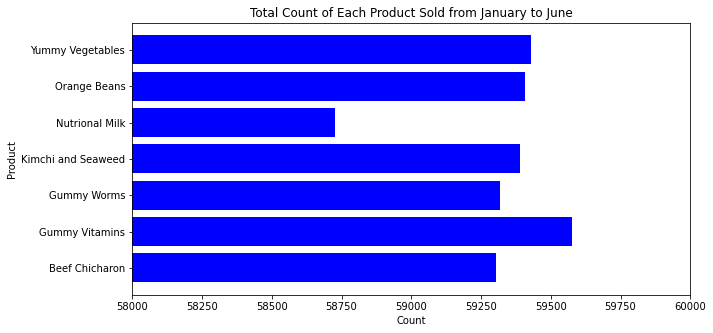

In [159]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.barh(y=df_total_qty['Product'], width=df_total_qty['Total Count of Each Product Sold'], color ='b')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Total Count of Each Product Sold from January to June')
plt.xlim(58000, 60000)
matplotlib.rcParams.update({'font.size': 10})
plt.savefig("totalcount.jpg")
plt.show()

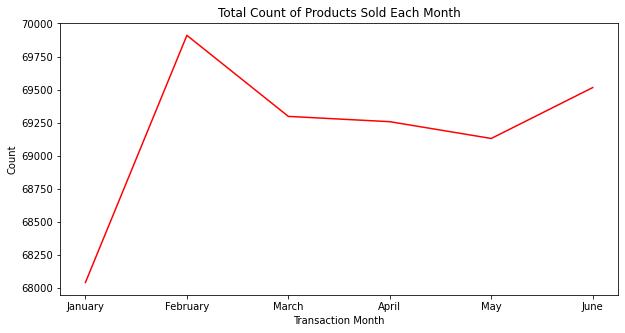

In [155]:
#total products sold per month
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(df_per_month['Transaction Month'],df_per_month['Total Count of All Products Sold'], 'r') #r is the color red
plt.xlabel('Transaction Month')
plt.ylabel('Count')
plt.title('Total Count of Products Sold Each Month')
plt.savefig("permonth.jpg")
matplotlib.rcParams.update({'font.size':10})
plt.show()

In [160]:
#sale value total codes
total_sale_value = pivot2.sum()
df_total_sale_value = total_sale_value.to_frame()
df_total_sale_value = total_sale_value.rename_axis('Product').to_frame().reset_index()
df_total_sale_value['Product'] = df_total_sale_value['Product'].replace(['beef_chicharon_sale_value','gummy_vitamins_sale_value', 'gummy_worms_sale_value', 'kimchi_and_seaweed_sale_value', 'nutrional_milk_sale_value', 'orange_beans_sale_value', 'yummy_vegetables_sale_value'],['Beef Chicharon','Gummy Vitamins', 'Gummy Worms', 'Kimchi and Seaweed', 'Nutrional Milk', 'Orange Beans', 'Yummy Vegetables'])
df_total_sale_value.rename(columns={0: 'Total Sale Value/Revenue Earned Per Product'}, inplace=True)
df_total_sale_value

,Product,Total Sale Value/Revenue Earned Per Product
0,Beef Chicharon,77033298
1,Gummy Vitamins,89364000
2,Gummy Worms,8897850
3,Kimchi and Seaweed,47452610
4,Nutrional Milk,116868720
5,Orange Beans,11821794
6,Yummy Vegetables,29714500


In [161]:
sale_value_per_month = pivot2.sum(axis = 1)
df_sale_value_per_month = sale_value_per_month.to_frame()
df_sale_value_per_month = sale_value_per_month.rename_axis('Transaction Month').to_frame().reset_index()
df_sale_value_per_month.rename(columns={0: 'Total Sale Value/Revenue Earned Per Month'}, inplace=True)
df_sale_value_per_month

,Transaction Month,Total Sale Value/Revenue Earned Per Month
0,January,62522565
1,February,63820403
2,March,63943846
3,April,63420965
4,May,63740675
5,June,63704318


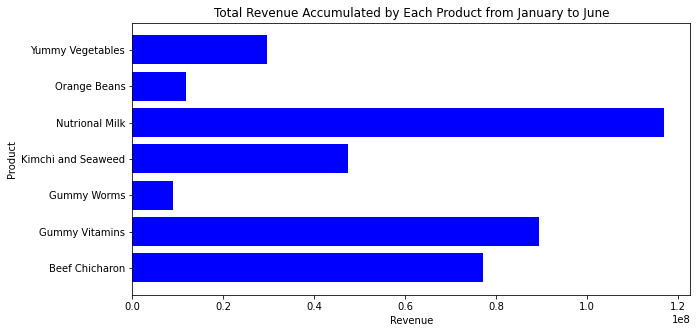

In [162]:
#graph of total revenue per product
plt.rcParams["figure.figsize"] = (10, 5)
plt.barh(y=df_total_sale_value['Product'], width=df_total_sale_value['Total Sale Value/Revenue Earned Per Product'], color ='b')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.title('Total Revenue Accumulated by Each Product from January to June')
plt.savefig("revenueeachitem.jpg")
plt.show()

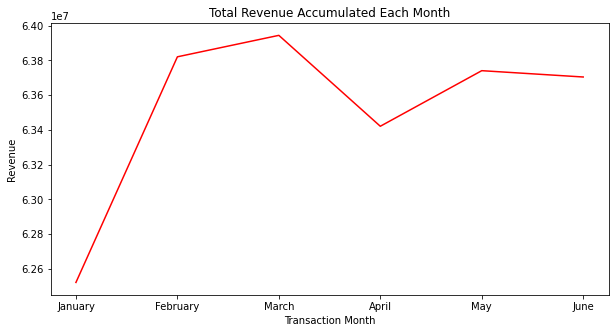

In [193]:
#graph of total revenue per month
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(df_sale_value_per_month['Transaction Month'],df_sale_value_per_month['Total Sale Value/Revenue Earned Per Month'], 'r') #r is the color red
plt.xlabel('Transaction Month')
plt.ylabel('Revenue')
plt.title('Total Revenue Accumulated Each Month')
plt.savefig("revenueeachmonth.jpg")
plt.show()

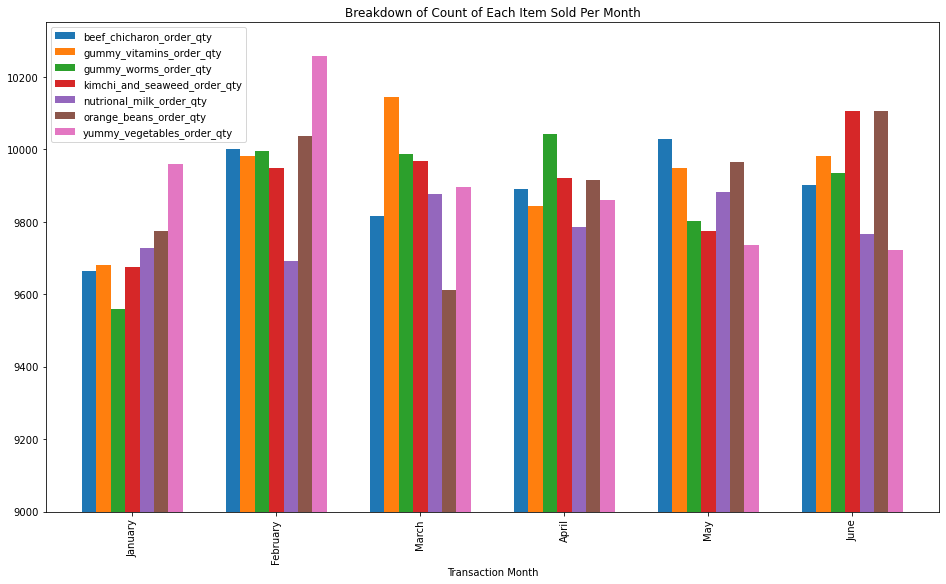

In [164]:
#pivot  
plt.rcParams["figure.figsize"] = (16, 9)
pivot1_modified = pivot.rename_axis('Transaction Month').reset_index()
pivot1_modified.plot(x = 'Transaction Month', y=['beef_chicharon_order_qty','gummy_vitamins_order_qty', 'gummy_worms_order_qty', 'kimchi_and_seaweed_order_qty', 'nutrional_milk_order_qty', 'orange_beans_order_qty', 'yummy_vegetables_order_qty'], kind = 'bar', width = 0.7)
plt.ylim(9000, 10350)
plt.title('Breakdown of Count of Each Item Sold Per Month')
plt.savefig("countpermonth.jpg")
plt.show()

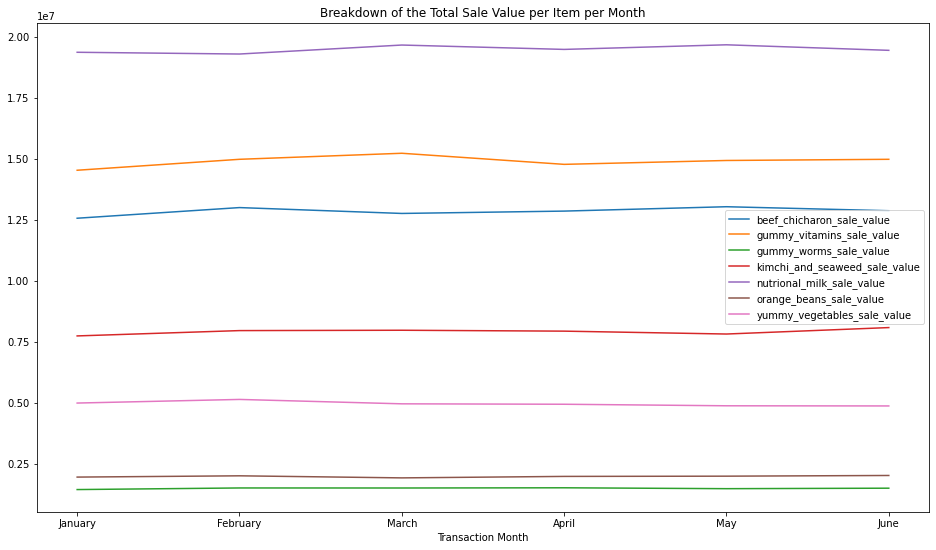

In [165]:
#pivot2 (sale value)
plt.rcParams["figure.figsize"] = (16, 9)
pivot2_modified = pivot2.rename_axis('Transaction Month').reset_index()
pivot2_modified.plot(x = 'Transaction Month', y=['beef_chicharon_sale_value','gummy_vitamins_sale_value', 'gummy_worms_sale_value', 'kimchi_and_seaweed_sale_value', 'nutrional_milk_sale_value', 'orange_beans_sale_value', 'yummy_vegetables_sale_value'], kind = 'line')
plt.title('Breakdown of the Total Sale Value per Item per Month')
plt.savefig("svpermonth.jpg")
plt.show()

In [166]:
#customer segmentation by sex
customer_segmentation = modified_df.groupby(['name'], as_index=False).first()
customer_segmentation

,name,address,birthdate,mail,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,...,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty,beef_chicharon_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,yummy_vegetables_sale_value,gummy_vitamins_sale_value,orange_beans_sale_value,gummy_worms_sale_value
0,Aaron Beasley,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4588,2022/04/24,"HealthyKid 3+,Nutrional Milk,(x1)",April,...,0,0,0,0,0,1990,0,0,0,0
1,Aaron Brewer,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,6490,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,...,3,0,0,0,0,0,0,4500,0,0
2,Aaron Brown,"532 Sexton Overpass\nFloresview, TN 53240",2013/12/21,charlesthompson@yahoo.com,M,coxjohnathan,5992,2022/03/27,"Candy City,Orange Beans,(x4)",March,...,0,4,0,0,0,0,0,0,796,0
3,Aaron Coffey,"9332 Edward Court\nRamirezland, NC 80112",2006/09/18,cstevens@yahoo.com,M,monique70,500,2022/01/19,"HealthyKid 3+,Yummy Vegetables,(x1)",January,...,0,0,0,0,0,0,500,0,0,0
4,Aaron Davis,"2729 Jessica Landing\nSanchezburgh, PA 22575",2010/01/25,wjames@hotmail.com,M,tcox,8260,2022/01/18,"Candy City,Gummy Worms,(x2)",January,...,0,0,2,0,0,0,0,0,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,"6594 Barnes Ramp Apt. 134\nNorth Toddmouth, WY...",2018/07/30,ihurst@gmail.com,M,jsmith,4450,2022/01/27,"Candy City,Gummy Worms,(x3)",January,...,0,0,3,0,0,0,0,0,0,450
8483,Zachary Ware,"67639 Jorge Isle\nWest Stephenfurt, KS 06856",2004/09/24,suzanneholmes@yahoo.com,M,bsloan,4996,2022/01/28,"Candy City,Orange Beans,(x2)",January,...,0,2,0,0,0,0,0,0,398,0
8484,Zachary Williams,"008 Mcdaniel Plaza\nMccartyhaven, DE 07143",1909/09/30,danielle98@gmail.com,M,bcollins,796,2022/01/30,"Candy City,Orange Beans,(x4)",January,...,0,4,0,0,0,0,0,0,796,0
8485,Zachary Wilson,"PSC 0371, Box 7472\nAPO AP 53894",1968/04/03,haaschristopher@hotmail.com,M,hpratt,5196,2022/04/04,"Exotic Extras,Beef Chicharon,(x4)",April,...,0,0,0,5196,0,0,0,0,0,0


In [167]:
print((customer_segmentation.sex == 'M').sum())
print((customer_segmentation.sex == 'F').sum())

4209
4278


In [168]:
customer_base = {4209, 4278}
customer_base = pd.DataFrame(customer_base)
customer_base['Sex'] = ['M', 'F']
customer_base.rename(columns={0: 'Total Count Within Customer Base'}, inplace=True)
customer_base[['Sex', 'Total Count Within Customer Base']]

,Sex,Total Count Within Customer Base
0,M,4209
1,F,4278


In [169]:
customer_segmentation = modified_df.groupby(['name', 'transaction_month'], as_index=False).first()
customer_segmentation

,name,transaction_month,address,birthdate,mail,sex,username,transaction_value,transaction_date,transaction_items,...,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty,beef_chicharon_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,yummy_vegetables_sale_value,gummy_vitamins_sale_value,orange_beans_sale_value,gummy_worms_sale_value
0,Aaron Beasley,April,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4588,2022/04/24,"HealthyKid 3+,Nutrional Milk,(x1)",...,0,0,0,0,0,1990,0,0,0,0
1,Aaron Beasley,June,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,1500,2022/06/27,"HealthyKid 3+,Gummy Vitamins,(x1)",...,1,0,0,0,0,0,0,1500,0,0
2,Aaron Beasley,May,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4500,2022/05/22,"HealthyKid 3+,Gummy Vitamins,(x3)",...,3,0,0,0,0,0,0,4500,0,0
3,Aaron Brewer,April,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,600,2022/04/05,"Candy City,Gummy Worms,(x4)",...,0,0,4,0,0,0,0,0,0,600
4,Aaron Brewer,February,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,6420,2022/02/26,"Candy City,Gummy Worms,(x3)",...,0,0,3,0,0,0,0,0,0,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,Zachary York,February,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,6194,2022/02/22,"Candy City,Gummy Worms,(x4)",...,0,0,4,0,0,0,0,0,0,600
39613,Zachary York,January,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,7960,2022/01/03,"HealthyKid 3+,Nutrional Milk,(x4)",...,0,0,0,0,0,7960,0,0,0,0
39614,Zachary York,June,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,5696,2022/06/10,"HealthyKid 3+,Gummy Vitamins,(x1)",...,1,0,0,0,0,0,0,1500,0,0
39615,Zachary York,March,"46641 Williams Bypass Suite 868\nGalvanfurt, N...",1920/07/11,ronald36@hotmail.com,M,jesusdaniel,11970,2022/03/18,"HealthyKid 3+,Gummy Vitamins,(x4)",...,4,0,0,0,0,0,0,6000,0,0


In [170]:
breakdown_by_sex_per_month = customer_segmentation.groupby(["transaction_month", "sex"])["name"].count()
breakdown_by_sex_per_month

transaction_month  sex
April              F      3318
                   M      3238
February           F      3360
                   M      3271
January            F      3301
                   M      3287
June               F      3335
                   M      3317
March              F      3314
                   M      3308
May                F      3293
                   M      3275
Name: name, dtype: int64

In [171]:
breakdown_by_sex_per_month = {'January': [3301,3287],'February': [3360, 3271],'March': [3314, 3308], 'April': [3318, 3238], 'May': [3293, 3275], 'June': [3335, 3317]}
breakdown_by_sex_per_month = pd.DataFrame(breakdown_by_sex_per_month)
breakdown_by_sex_per_month.index = ['F', 'M']
breakdown_by_sex_per_month

,January,February,March,April,May,June
F,3301,3360,3314,3318,3293,3335
M,3287,3271,3308,3238,3275,3317


In [172]:
breakdown_by_sex_per_month2 = breakdown_by_sex_per_month.transpose()
breakdown_by_sex_per_month2 = breakdown_by_sex_per_month2.rename_axis('Transaction Month').reset_index()
breakdown_by_sex_per_month2

,Transaction Month,F,M
0,January,3301,3287
1,February,3360,3271
2,March,3314,3308
3,April,3318,3238
4,May,3293,3275
5,June,3335,3317


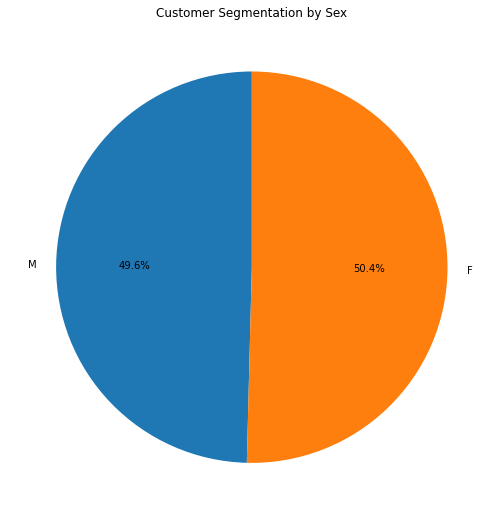

In [173]:
#overall customer base
sex_data = [4209, 4278]
label = ['M', 'F']
plt.rcParams["figure.figsize"] = (20, 9)
plt.pie(sex_data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation by Sex')
plt.savefig("customersegmentationbysex.jpg")
plt.show()

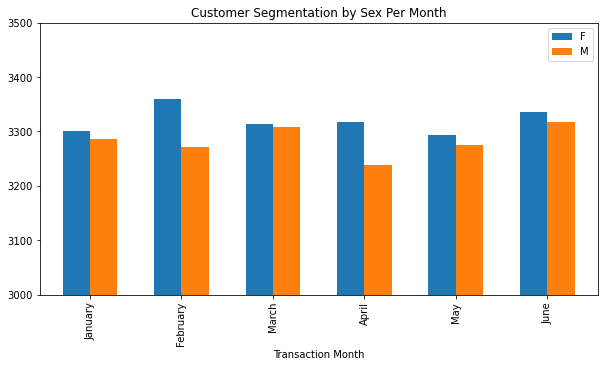

In [174]:
#breakdown each month
plt.rcParams["figure.figsize"] = (10, 5)
breakdown_by_sex_per_month2.plot(x = 'Transaction Month', y=['F','M'], kind = 'bar', width = 0.6)
plt.ylim(3000, 3500)
plt.title('Customer Segmentation by Sex Per Month')
plt.savefig("customersegmentationbysexpermonth.jpg")
plt.show()

In [175]:
customer_segmentation_address = modified_df.groupby(['name'], as_index=False).first()
customer_segmentation_address

,name,address,birthdate,mail,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,...,gummy_vitamins_order_qty,orange_beans_order_qty,gummy_worms_order_qty,beef_chicharon_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,yummy_vegetables_sale_value,gummy_vitamins_sale_value,orange_beans_sale_value,gummy_worms_sale_value
0,Aaron Beasley,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4588,2022/04/24,"HealthyKid 3+,Nutrional Milk,(x1)",April,...,0,0,0,0,0,1990,0,0,0,0
1,Aaron Brewer,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,6490,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,...,3,0,0,0,0,0,0,4500,0,0
2,Aaron Brown,"532 Sexton Overpass\nFloresview, TN 53240",2013/12/21,charlesthompson@yahoo.com,M,coxjohnathan,5992,2022/03/27,"Candy City,Orange Beans,(x4)",March,...,0,4,0,0,0,0,0,0,796,0
3,Aaron Coffey,"9332 Edward Court\nRamirezland, NC 80112",2006/09/18,cstevens@yahoo.com,M,monique70,500,2022/01/19,"HealthyKid 3+,Yummy Vegetables,(x1)",January,...,0,0,0,0,0,0,500,0,0,0
4,Aaron Davis,"2729 Jessica Landing\nSanchezburgh, PA 22575",2010/01/25,wjames@hotmail.com,M,tcox,8260,2022/01/18,"Candy City,Gummy Worms,(x2)",January,...,0,0,2,0,0,0,0,0,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,"6594 Barnes Ramp Apt. 134\nNorth Toddmouth, WY...",2018/07/30,ihurst@gmail.com,M,jsmith,4450,2022/01/27,"Candy City,Gummy Worms,(x3)",January,...,0,0,3,0,0,0,0,0,0,450
8483,Zachary Ware,"67639 Jorge Isle\nWest Stephenfurt, KS 06856",2004/09/24,suzanneholmes@yahoo.com,M,bsloan,4996,2022/01/28,"Candy City,Orange Beans,(x2)",January,...,0,2,0,0,0,0,0,0,398,0
8484,Zachary Williams,"008 Mcdaniel Plaza\nMccartyhaven, DE 07143",1909/09/30,danielle98@gmail.com,M,bcollins,796,2022/01/30,"Candy City,Orange Beans,(x4)",January,...,0,4,0,0,0,0,0,0,796,0
8485,Zachary Wilson,"PSC 0371, Box 7472\nAPO AP 53894",1968/04/03,haaschristopher@hotmail.com,M,hpratt,5196,2022/04/04,"Exotic Extras,Beef Chicharon,(x4)",April,...,0,0,0,5196,0,0,0,0,0,0


In [176]:
extract_state = customer_segmentation_address['state'] = [x[1][-8:-6] for x in np.array(customer_segmentation_address)]

def get_state(extract_state):
    if extract_state == 'AL':
        return 'Alabama'
    elif extract_state == 'AK':
        return 'Alaska'
    elif extract_state == 'AS':
        return 'American Samoa'
    elif extract_state == 'AZ':
        return 'Arizona'
    elif extract_state == 'AR':
        return 'Arkansas'
    elif extract_state == 'CA':
        return 'California'
    elif extract_state == 'CO':
        return 'Colorado'
    elif extract_state == 'CT':
        return 'Connecticut'
    elif extract_state == 'DE':
        return 'Delaware'
    elif extract_state == 'DC':
        return 'District of Columbia'
    elif extract_state == 'FM':
        return 'Federated States of Micronesia'
    elif extract_state == 'FL':
        return 'Florida'
    elif extract_state == 'GA':
        return 'Georgia'
    elif extract_state == 'GU':
        return 'Guam'
    elif extract_state == 'HI':
        return 'Hawaii'
    elif extract_state == 'ID':
        return 'Idaho'
    elif extract_state == 'IL':
        return 'Illinois'
    elif extract_state == 'IN':
        return 'Indiana'
    elif extract_state == 'IA':
        return 'Iowa'
    elif extract_state == 'KS':
        return 'Kansas'
    elif extract_state == 'KY':
        return 'Kentucky'
    elif extract_state == 'LA':
        return 'Louisiana'
    elif extract_state == 'ME':
        return 'Maine'
    elif extract_state == 'MH':
        return 'Marshall Islands'
    elif extract_state == 'MD':
        return 'Maryland'
    elif extract_state == 'MA':
        return 'Massachusetts'
    elif extract_state == 'MI':
        return 'Michigan'
    elif extract_state == 'MN':
        return 'Minnesota'
    elif extract_state == 'MS':
        return 'Mississipi'
    elif extract_state == 'MO':
        return 'Missouri'
    elif extract_state == 'MT':
        return 'Montana'
    elif extract_state == 'NE':
        return 'Nebraska'
    elif extract_state == 'NV':
        return 'Nevada'
    elif extract_state == 'NH':
        return 'New Hampshire'
    elif extract_state == 'NJ':
        return 'New Jersey'
    elif extract_state == 'NM':
        return 'New Mexico'
    elif extract_state == 'NY':
        return 'New York'
    elif extract_state == 'NC':
        return 'North Carolina'
    elif extract_state == 'ND':
        return 'North Dakota'
    elif extract_state == 'MP':
        return 'Northern Mariana Islands'
    elif extract_state == 'OH':
        return 'Ohio'
    elif extract_state == 'OK':
        return 'Oklahoma'
    elif extract_state == 'OR':
        return 'Oregon'
    elif extract_state == 'PA':
        return 'Pennsylvania'
    elif extract_state == 'PR':
        return 'Puerto Rico'
    elif extract_state == 'RI':
        return 'Rhode Island'
    elif extract_state == 'SC':
        return 'South Carolina'
    elif extract_state == 'SD':
        return 'South Dakota'
    elif extract_state == 'TN':
        return 'Tennessee'
    elif extract_state == 'TX':
        return 'Texas'
    elif extract_state == 'UT':
        return 'Utah'
    elif extract_state == 'VT':
        return 'Vermont'
    elif extract_state == 'VA':
        return 'Virginia'
    elif extract_state == 'VI':
        return 'Virgin Islands'
    elif extract_state == 'WA':
        return 'Washington'
    elif extract_state == 'WV':
        return 'West Virginia'
    elif extract_state == 'WI':
        return 'Wisconsin'
    elif extract_state == 'WY':
        return 'Wyoming'
    elif extract_state == 'AA':
        return 'Armed Forces the Americas'
    elif extract_state == 'AE':
        return 'Armed Forces Europe'
    elif extract_state == 'AP':
        return 'Armed Forces Pacific' 
    else:
        return 'Other'
    
customer_segmentation_address['state'] = customer_segmentation_address['state'].apply(get_state)

In [177]:
state_count = customer_segmentation_address['state'].value_counts().to_frame()
state_count

,state
Armed Forces the Americas,310
Armed Forces Pacific,300
Armed Forces Europe,285
Wyoming,179
Hawaii,178
Ohio,171
Illinois,164
Utah,163
West Virginia,163
Texas,162


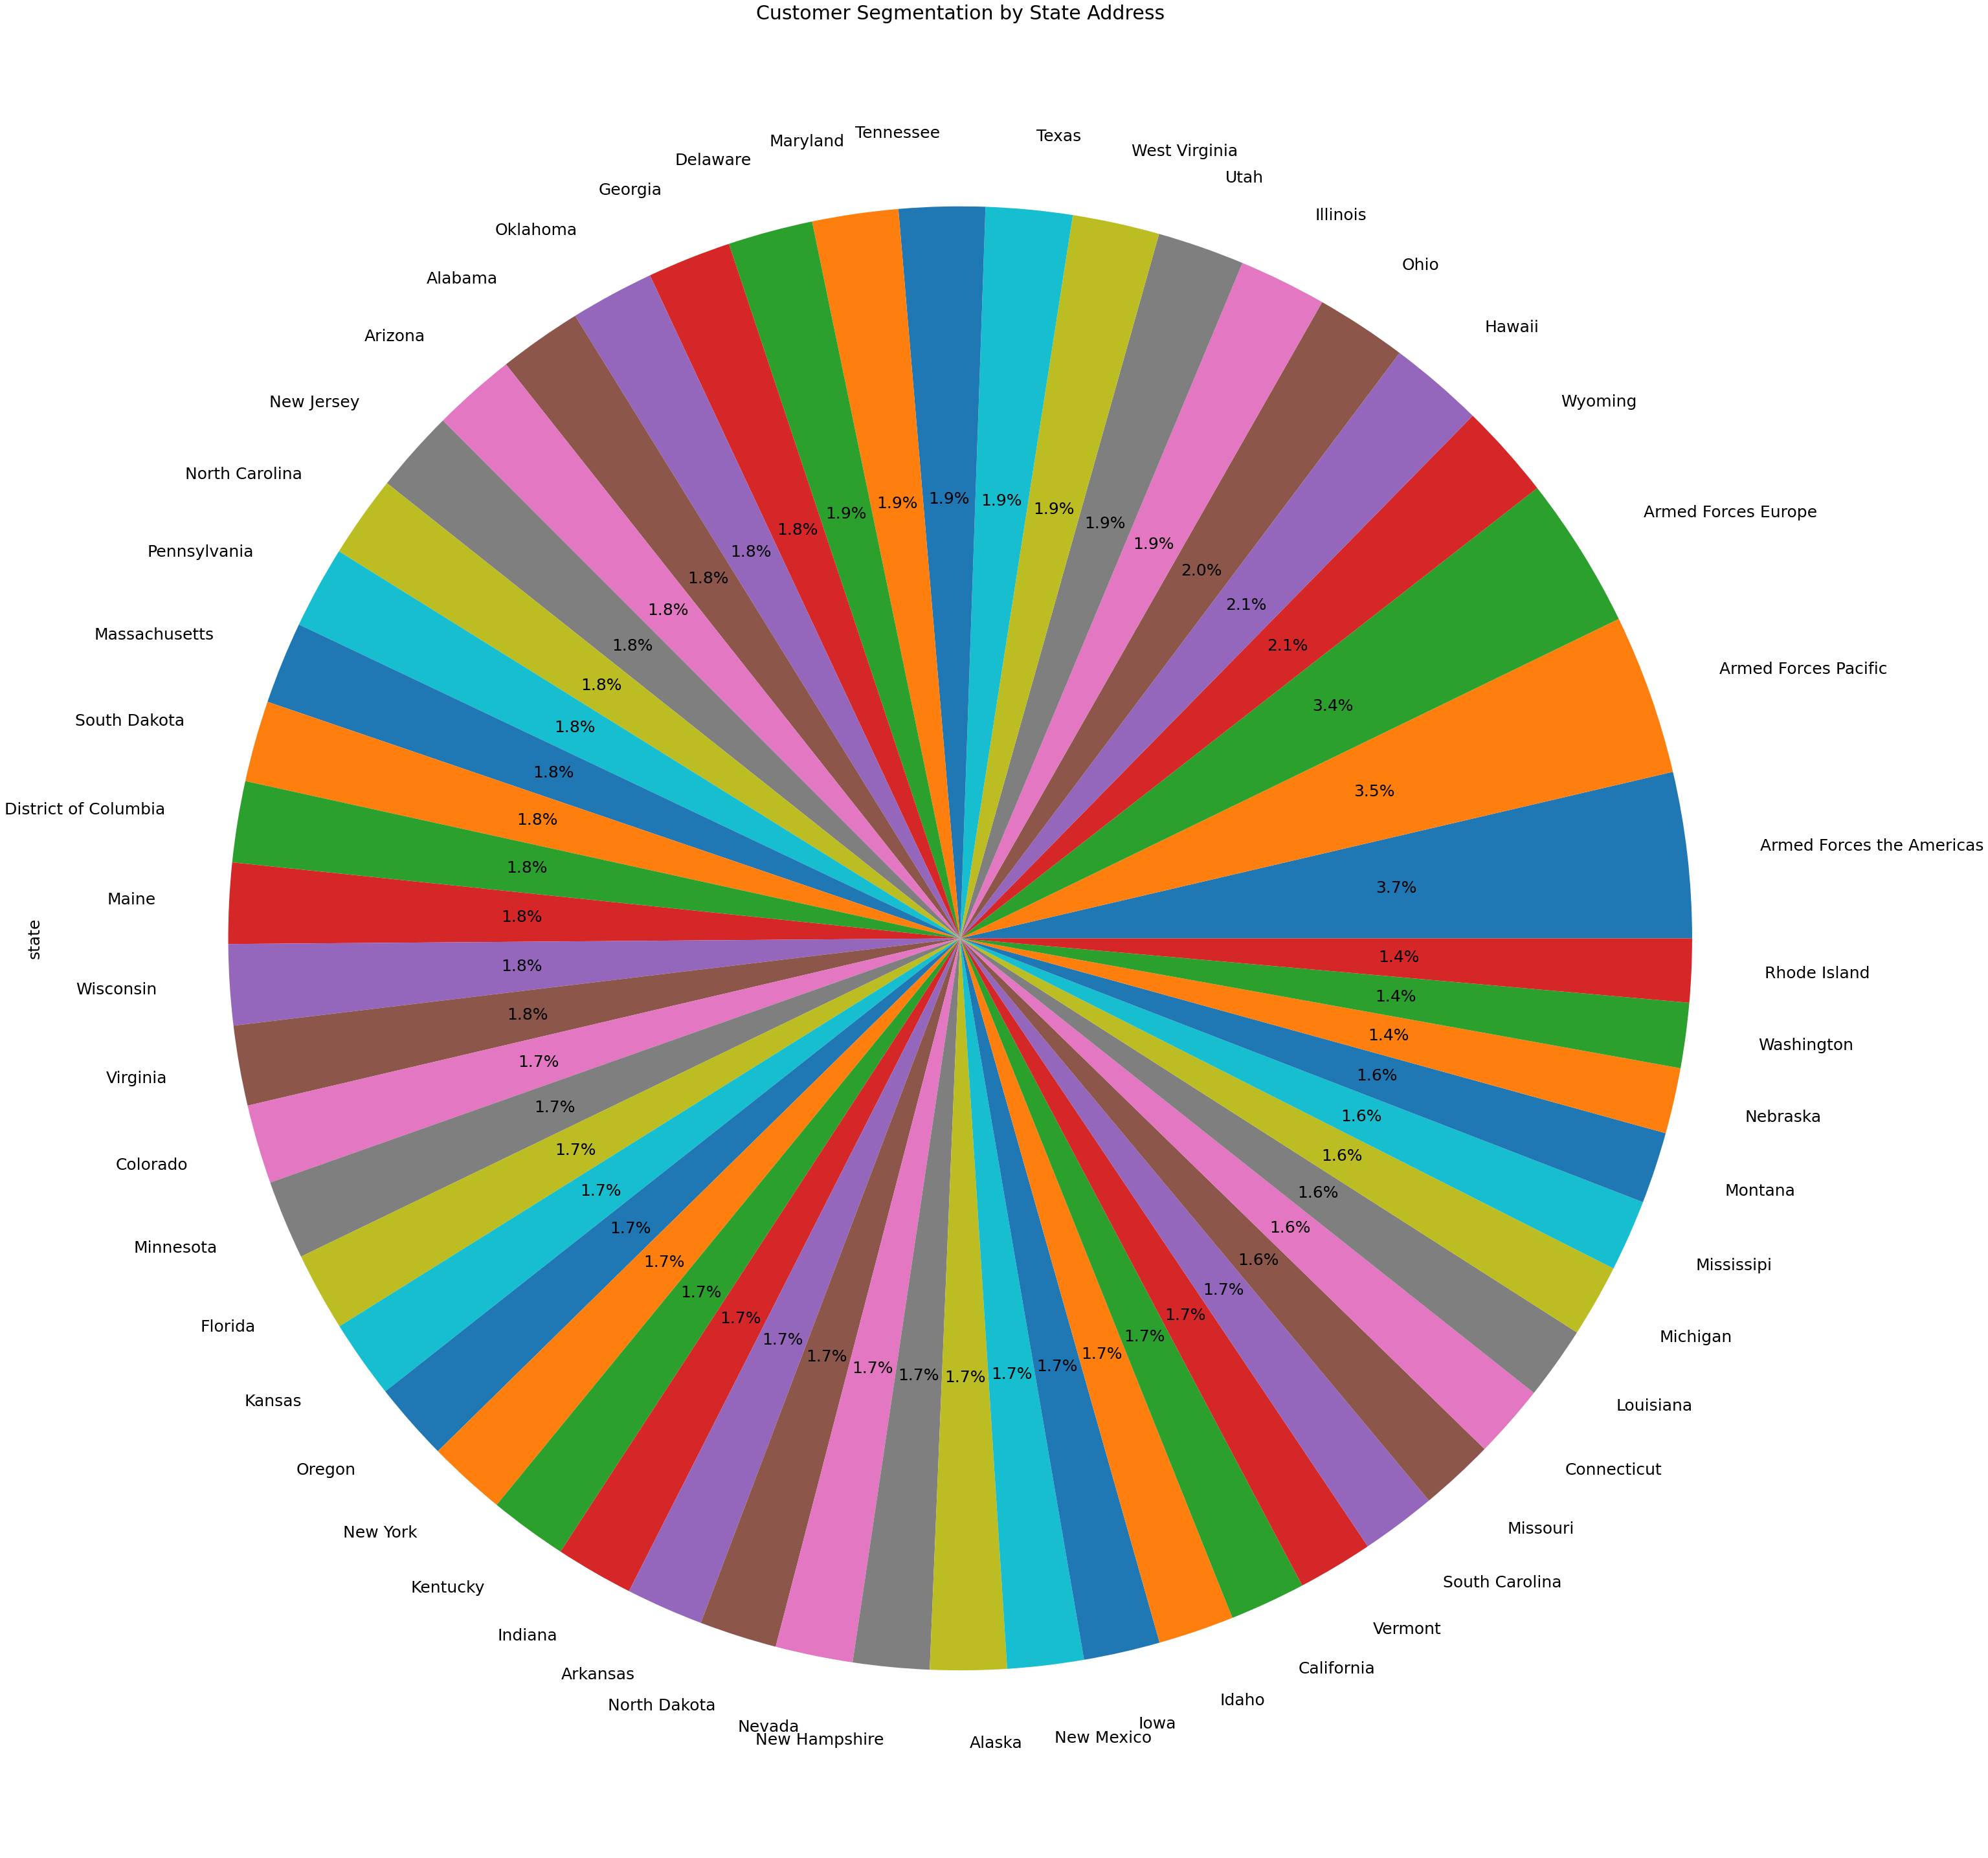

In [181]:
plt.rcParams["figure.figsize"] = (80, 52)
state_count.plot(kind='pie', y = 'state', autopct='%1.1f%%', legend = None)
plt.title('Customer Segmentation by State Address')
matplotlib.rcParams.update({'font.size': 20})
plt.savefig("customersegmentationbystate.jpg")
plt.show()

In [182]:
customer_activity_df2 = customer_activity_df.transpose()
customer_activity_df2

,Repeater,Inactive,Engaged
January,0,0,6588
February,5172,1416,5172
March,5216,1747,4126
April,5154,1909,3289
May,5110,1917,2667
June,5193,1835,2190


In [183]:
plt.rcParams["figure.figsize"] = (8, 6)
customer_activity_df2 = customer_activity_df2.rename_axis('Transaction Month').reset_index()

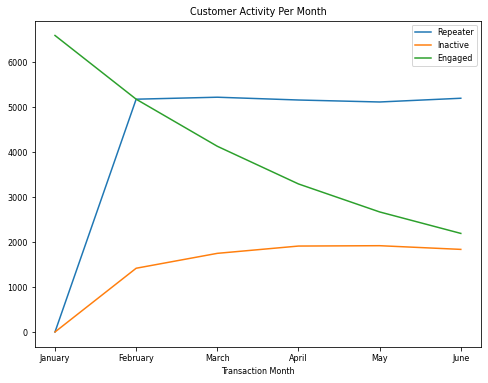

In [185]:
customer_activity_df2.plot(x = 'Transaction Month', y=['Repeater', 'Inactive', 'Engaged'], kind = 'line')
plt.title('Customer Activity Per Month')
matplotlib.rcParams.update({'font.size': 8})

In [186]:
#age demographic
#generation 
customer_segmentation_age = modified_df.groupby(['name'], as_index=False).first()

birthyear = customer_segmentation_age['generation'] = [x[2][0:4] for x in np.array(customer_segmentation_age)]

def get_generation(birthyear):
    if birthyear in [str(birthyear) for birthyear in range(1901, 1925)]:
        return 'The Greatest Generation'
    elif birthyear in [str(birthyear) for birthyear in range(1925, 1946)]:
        return 'Silent Generation/Traditionalists'
    elif birthyear in [str(birthyear) for birthyear in range(1946, 1965)]:
        return 'Baby Boomers'
    elif birthyear in [str(birthyear) for birthyear in range(1965, 1981)]:
        return 'Generation X'
    elif birthyear in [str(birthyear) for birthyear in range(1981, 1997)]:
        return 'Millennials'
    elif birthyear in [str(birthyear) for birthyear in range(1997, 2013)]:
        return 'Generation Z' 
    elif birthyear in [str(birthyear) for birthyear in range(2013, 2025)]:
        return 'Generation Alpha'
    
customer_segmentation_age['generation'] = customer_segmentation_age['generation'].apply(get_generation)

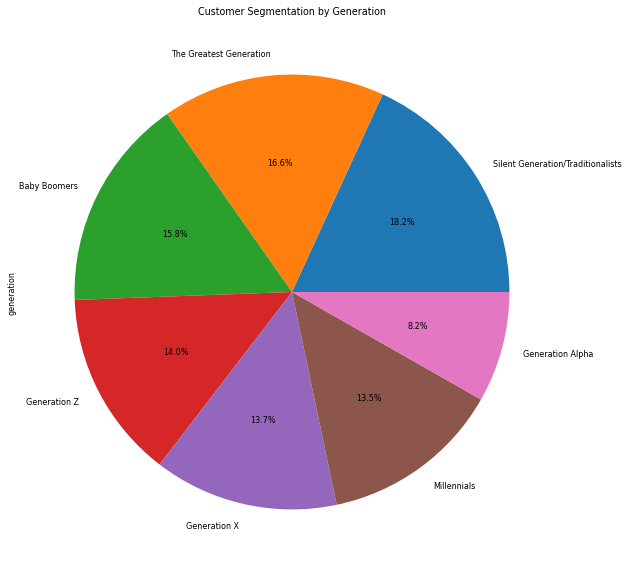

In [187]:
customer_segmentation_age
generation_count = customer_segmentation_age['generation'].value_counts().to_frame()
plt.rcParams["figure.figsize"] = (50, 10)
generation_count.plot(kind='pie', y = 'generation', autopct='%1.1f%%', legend = None)
plt.savefig("customersegmentationbygeneration.jpg")
plt.title('Customer Segmentation by Generation')
plt.show()

In [188]:
#birthday promos
birthmonth = customer_segmentation_age['birth_month'] = [x[2][6] for x in np.array(customer_segmentation_age)]

def get_birthmonth(birthmonth):
    if birthmonth == '1':
        return 'January'
    elif birthmonth == '2':
        return 'February'
    elif birthmonth == '3':
        return 'March'
    elif birthmonth == '4':
        return 'April'
    elif birthmonth == '5':
        return 'May'
    else:
        return 'June'
    
customer_segmentation_age['birth_month'] = customer_segmentation_age['birth_month'].apply(get_birthmonth)

In [189]:
customer_segmentation_age

,name,address,birthdate,mail,sex,username,transaction_value,transaction_date,transaction_items,transaction_month,...,gummy_worms_order_qty,beef_chicharon_sale_value,kimchi_and_seaweed_sale_value,nutrional_milk_sale_value,yummy_vegetables_sale_value,gummy_vitamins_sale_value,orange_beans_sale_value,gummy_worms_sale_value,generation,birth_month
0,Aaron Beasley,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,4588,2022/04/24,"HealthyKid 3+,Nutrional Milk,(x1)",April,...,0,0,0,1990,0,0,0,0,Generation Z,February
1,Aaron Brewer,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,6490,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",January,...,0,0,0,0,0,4500,0,0,Silent Generation/Traditionalists,February
2,Aaron Brown,"532 Sexton Overpass\nFloresview, TN 53240",2013/12/21,charlesthompson@yahoo.com,M,coxjohnathan,5992,2022/03/27,"Candy City,Orange Beans,(x4)",March,...,0,0,0,0,0,0,796,0,Generation Alpha,February
3,Aaron Coffey,"9332 Edward Court\nRamirezland, NC 80112",2006/09/18,cstevens@yahoo.com,M,monique70,500,2022/01/19,"HealthyKid 3+,Yummy Vegetables,(x1)",January,...,0,0,0,0,500,0,0,0,Generation Z,June
4,Aaron Davis,"2729 Jessica Landing\nSanchezburgh, PA 22575",2010/01/25,wjames@hotmail.com,M,tcox,8260,2022/01/18,"Candy City,Gummy Worms,(x2)",January,...,2,0,0,0,0,0,0,300,Generation Z,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Zachary Valentine,"6594 Barnes Ramp Apt. 134\nNorth Toddmouth, WY...",2018/07/30,ihurst@gmail.com,M,jsmith,4450,2022/01/27,"Candy City,Gummy Worms,(x3)",January,...,3,0,0,0,0,0,0,450,Generation Alpha,June
8483,Zachary Ware,"67639 Jorge Isle\nWest Stephenfurt, KS 06856",2004/09/24,suzanneholmes@yahoo.com,M,bsloan,4996,2022/01/28,"Candy City,Orange Beans,(x2)",January,...,0,0,0,0,0,0,398,0,Generation Z,June
8484,Zachary Williams,"008 Mcdaniel Plaza\nMccartyhaven, DE 07143",1909/09/30,danielle98@gmail.com,M,bcollins,796,2022/01/30,"Candy City,Orange Beans,(x4)",January,...,0,0,0,0,0,0,796,0,The Greatest Generation,June
8485,Zachary Wilson,"PSC 0371, Box 7472\nAPO AP 53894",1968/04/03,haaschristopher@hotmail.com,M,hpratt,5196,2022/04/04,"Exotic Extras,Beef Chicharon,(x4)",April,...,0,5196,0,0,0,0,0,0,Generation X,April


In [190]:
birthmonth_count = customer_segmentation_age['birth_month'].value_counts().to_frame()

In [191]:
birthmonth_count = birthmonth_count.reindex(transaction_month)
birthmonth_count

,birth_month
January,1434
February,1373
March,708
April,689
May,710
June,3573


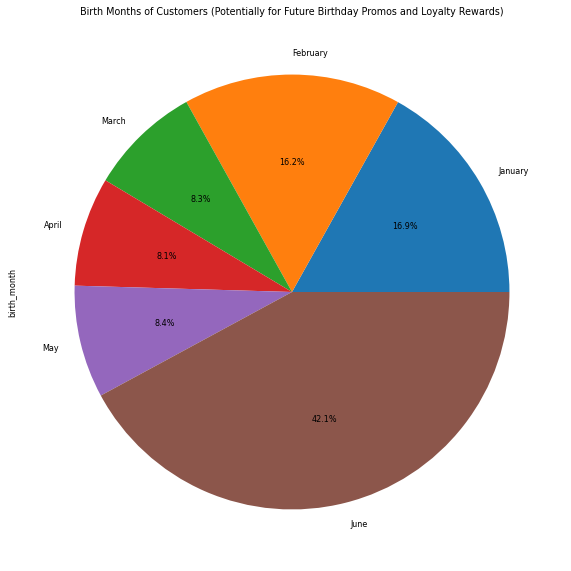

In [192]:
plt.rcParams["figure.figsize"] = (50, 10)
birthmonth_count.plot(kind='pie', y = 'birth_month', autopct='%1.1f%%', legend = None)
plt.title('Birth Months of Customers (Potentially for Future Birthday Promos and Loyalty Rewards)')
matplotlib.rcParams.update({'font.size': 10})
plt.savefig("customerbirthmonths.jpg")
plt.show()